In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_excel('/content/Lab1.xlsx', index_col=0, comment='#') 
df

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,53.0,31.7,...,56.5,-,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,0.311909
2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,58.8,37.6,...,56.5,-,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,0.288600
2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,63.6,42.8,...,56.5,-,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,0.248791
2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,64.7,46.2,...,56.5,-,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,0.223559
2008-06-09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,64.0,49.4,...,56.5,-,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,0.215149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-09-23,3678,12.70,182.2,271.586,93.255111,179.0,258.6,92.702141,55.6,41.8,...,60.9,60.8,89.7,88.527017,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-27,3678,14.29,157.0,249.076,96.472143,153.0,233.5,100.060417,56.7,47.6,...,60.9,60.8,87.3,86.158401,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-09,3679.5,7.94,211.9,289.3877,91.131226,208.0,289.6,91.304642,47.0,24.4,...,64.1,61.3,88.2,87.046632,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-14,3679.5,9.53,204.0,282.8709,91.173008,201.0,275.3,91.616821,48.9,26.7,...,64.1,61.3,88.5,87.342709,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.replace('-', np.nan, regex=True)
df = df.replace('не спускался', np.nan, regex=True)

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Глубина манометра - 2%
Dшт - 0%
Руст - 0%
Рзаб - 2%
Pлин - 4%
Руст.1 - 0%
Рзаб.1 - 2%
Рлин - 6%
Туст - 0%
Тна шлейфе - 33%
Тзаб - 2%
Tлин - 4%
Дебит газа - 0%
Дебит ст. конд. - 0%
Дебит воды - 0%
Дебит смеси - 5%
Дебит гааз - 4%
Дебит кон нестабильный - 4%
Дебит воды.1 - 4%
Нэф - 0%
Рпл. Тек (послед точка на КВД) - 4%
Рпл. Тек (Расчет по КВД) - 15%
Рпл. Тек (Карноухов) - 27%
Pсб - 4%
Pсб.1 - 4%
Ro_g - 88%
Ro_c - 50%
Ro_w - 88%
Удельная плотность газа  - 50%
G_total - 88%
КГФ - 50%


In [6]:
df_less_missing_rows = df.dropna(subset=['G_total', 'КГФ'], how='all')
df_less_missing_rows

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
2008-06-05,3576.3,7.94,249.600000,370.1,101.8,249.0,359.6,101.8,53.0,31.7,...,56.5,NaN,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,0.311909
2008-06-06,3576.3,9.53,233.500000,364.6,101.3,231.0,338.1,102.4,58.8,37.6,...,56.5,NaN,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,0.288600
2008-06-07,3576.3,11.11,213.400000,357.1,101.6,211.0,314.8,100.6,63.6,42.8,...,56.5,NaN,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,0.248791
2008-06-08,3576.3,12.70,191.600000,347.4,98.4,187.0,291.5,99,64.7,46.2,...,56.5,NaN,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,0.223559
2008-06-09,3576.3,14.29,171.900000,337.7,99.2,169.0,270.3,99.5,64.0,49.4,...,56.5,NaN,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,0.215149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-01-28,3284,12.70,215.000000,307.8,98.6,215.0,308.1,97.2,65.0,45.8,...,40.5,41.6,94.4,93.165556,NaN,782.0,NaN,0.660000,NaN,0.153000
2009-02-01,3284,14.29,198.000000,293.6,98.5,197.0,293.9,98.4,66.9,49.8,...,40.5,41.6,94.0,92.770787,NaN,782.0,NaN,0.660000,NaN,0.147000
2010-08-16,3288.6,7.94,231.229167,309.1,92.6,230.0,307.1,92.7,51.0,NaN,...,NaN,NaN,89.9,88.724402,NaN,779.6,NaN,0.668000,NaN,0.182000
2010-08-20,3288.6,11.11,217.201681,293.9,93.1,215.0,293.9,93.3,60.0,NaN,...,NaN,NaN,90.8,89.612633,NaN,779.6,NaN,0.668000,NaN,0.145000


In [7]:
df_less_missing_rows = df_less_missing_rows.drop(columns = ['Ro_g'], axis = 1)
df_less_missing_rows = df_less_missing_rows.drop(columns = ['Ro_w'], axis = 1)

In [8]:
np.abs(df_less_missing_rows.corr())

,Dшт,Руст,Руст.1,Туст,Дебит газа,Дебит ст. конд.,Дебит воды,Нэф,Pсб,Pсб.1,Ro_c,Удельная плотность газа,G_total,КГФ
Dшт,1.000000,0.386698,0.389556,0.542294,0.865622,0.621313,0.536016,0.167398,0.027716,0.027716,0.093584,0.194179,0.735355,0.231636
Руст,0.386698,1.000000,0.999288,0.107952,0.068104,0.307248,0.099397,0.208647,0.174191,0.174191,0.109322,0.380945,0.115329,0.494718
Руст.1,0.389556,0.999288,1.000000,0.108682,0.066578,0.299897,0.098633,0.200159,0.174389,0.174389,0.113124,0.383703,0.125809,0.481088
Туст,0.542294,0.107952,0.108682,1.000000,0.657424,0.538248,0.554249,0.343119,0.473788,0.473788,0.198077,0.395451,0.689091,0.170377
Дебит газа,0.865622,0.068104,0.066578,0.657424,1.000000,0.836553,0.641696,0.291002,0.067155,0.067155,0.069634,0.342555,0.993426,0.044515
Дебит ст. конд.,0.621313,0.307248,0.299897,0.538248,0.836553,1.000000,0.518666,0.357679,0.074457,0.074457,0.086055,0.335353,0.966527,0.458866
Дебит воды,0.536016,0.099397,0.098633,0.554249,0.641696,0.518666,1.000000,0.103691,0.317671,0.317671,0.042349,0.255689,0.842481,0.150919
Нэф,0.167398,0.208647,0.200159,0.343119,0.291002,0.357679,0.103691,1.000000,0.250150,0.250150,0.111661,0.051892,0.450412,0.140222
Pсб,0.027716,0.174191,0.174389,0.473788,0.067155,0.074457,0.317671,0.250150,1.000000,1.000000,0.131570,0.035813,0.113662,0.026800
Pсб.1,0.027716,0.174191,0.174389,0.473788,0.067155,0.074457,0.317671,0.250150,1.000000,1.000000,0.131570,0.035813,0.113662,0.026800


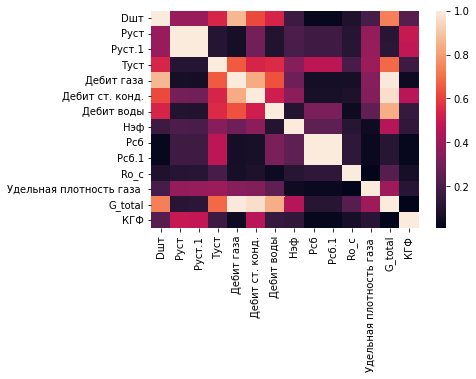

In [9]:
sns.heatmap(np.abs(df_less_missing_rows.corr()))

In [10]:
def info_printer(f):
  sns_plot = sns.distplot(f)
  fig = sns_plot.get_figure()
  plt.axvline(x = f.quantile(0.25), color = 'g')
  plt.axvline(x = f.quantile(0.75), color = 'g')
  plt.show
  print("Пропущено:\t", round(f.isna().sum() / f.size * 100, 3), "%")
  print("Мощность:\t", f.nunique())
  print("Среднее:\t", round(f.mean(), 3))
  print("Минимум:\t", round(f.min(), 3))
  print("Максимум:\t", round(f.max(), 3))
  print("1 кваниль:\t", round(f.quantile(0.25), 3))
  print("Медиана:\t", round(f.quantile(0.5), 3))
  print("3 квантиль:\t", round(f.quantile(0.75), 3))
  print("Кварт. размах:\t", round(f.quantile(0.75) - f.quantile(0.25), 3))
  print("Стандарт.откл:\t", round(f.std(), 3))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 3.226 %
Мощность:	 20
Среднее:	 3524.087
Минимум:	 3276
Максимум:	 3670
1 кваниль:	 3427.625
Медиана:	 3579.0
3 квантиль:	 3652.25
Кварт. размах:	 224.625
Стандарт.откл:	 144.475


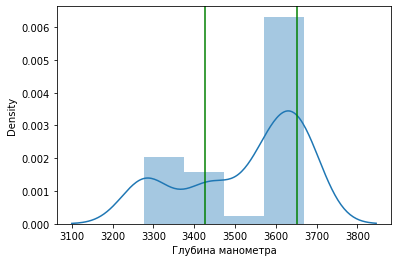

In [26]:
info_printer(df_less_missing_rows['Глубина манометра'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 10
Среднее:	 10.951
Минимум:	 6.35
Максимум:	 15.88
1 кваниль:	 9.53
Медиана:	 11.11
3 квантиль:	 12.7
Кварт. размах:	 3.17
Стандарт.откл:	 2.423


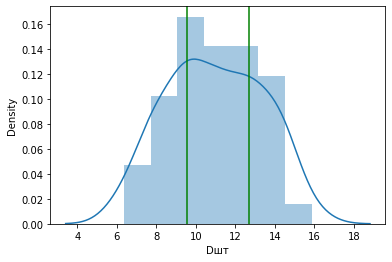

In [ ]:
info_printer(df_less_missing_rows['Dшт'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 87
Среднее:	 228.293
Минимум:	 138.158
Максимум:	 337.108
1 кваниль:	 201.637
Медиана:	 229.895
3 квантиль:	 252.0
Кварт. размах:	 50.363
Стандарт.откл:	 41.897


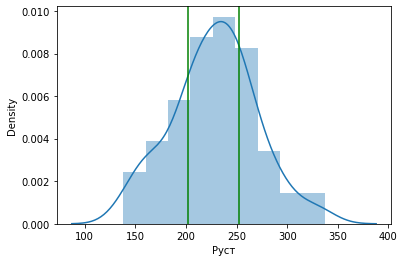

In [ ]:
info_printer(df_less_missing_rows['Руст'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 3.226 %
Мощность:	 88
Среднее:	 331.762
Минимум:	 174
Максимум:	 458.6
1 кваниль:	 297.798
Медиана:	 337.789
3 квантиль:	 364.15
Кварт. размах:	 66.353
Стандарт.откл:	 56.481


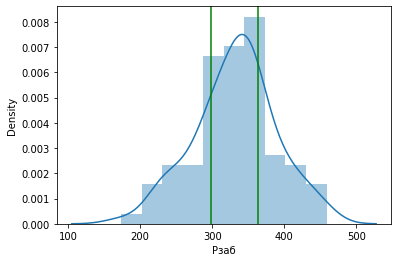

In [ ]:
info_printer(df_less_missing_rows['Рзаб'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 91
Среднее:	 99.861
Минимум:	 73.307
Максимум:	 121.683
1 кваниль:	 95.946
Медиана:	 100.8
3 квантиль:	 103.865
Кварт. размах:	 7.919
Стандарт.откл:	 7.301


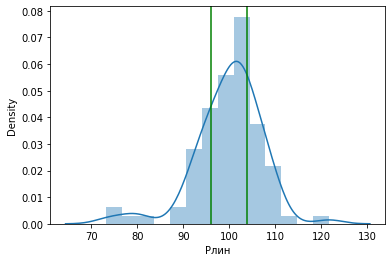

In [ ]:
info_printer(df_less_missing_rows['Pлин'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 73
Среднее:	 227.644
Минимум:	 136.0
Максимум:	 333.0
1 кваниль:	 200.0
Медиана:	 228.0
3 квантиль:	 252.0
Кварт. размах:	 52.0
Стандарт.откл:	 41.757


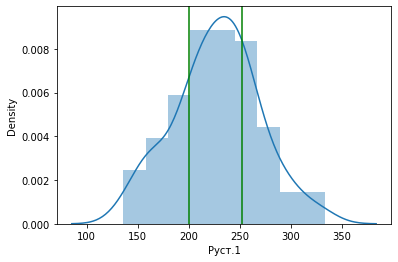

In [ ]:
info_printer(df_less_missing_rows['Руст.1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 3.226 %
Мощность:	 89
Среднее:	 330.334
Минимум:	 174
Максимум:	 458.5
1 кваниль:	 294.625
Медиана:	 334.25
3 квантиль:	 362.15
Кварт. размах:	 67.525
Стандарт.откл:	 56.357


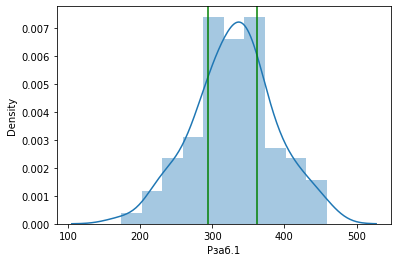

In [ ]:
info_printer(df_less_missing_rows['Рзаб.1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 88
Среднее:	 98.005
Минимум:	 40.74
Максимум:	 123.617
1 кваниль:	 95.335
Медиана:	 100.26
3 квантиль:	 104.0
Кварт. размах:	 8.665
Стандарт.откл:	 12.426


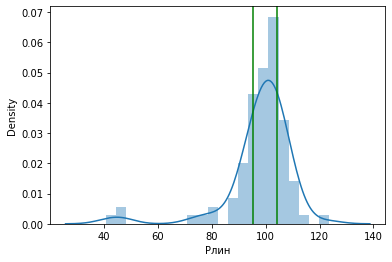

In [ ]:
info_printer(df_less_missing_rows['Рлин'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 51
Среднее:	 56.172
Минимум:	 24.2
Максимум:	 75.0
1 кваниль:	 50.3
Медиана:	 58.0
3 квантиль:	 64.0
Кварт. размах:	 13.7
Стандарт.откл:	 11.251


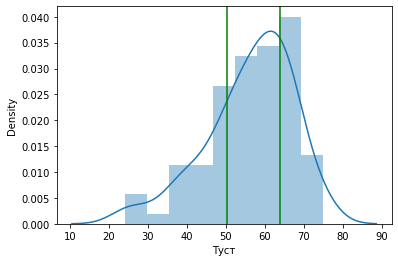

In [ ]:
info_printer(df_less_missing_rows['Туст'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 35.484 %
Мощность:	 57
Среднее:	 43.092
Минимум:	 14
Максимум:	 110.2
1 кваниль:	 33.3
Медиана:	 38.7
3 квантиль:	 46.375
Кварт. размах:	 13.075
Стандарт.откл:	 19.602


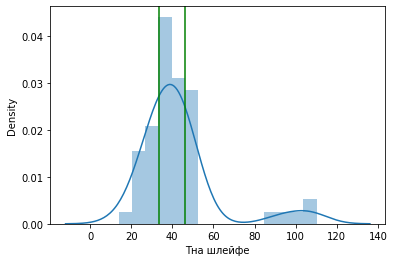

In [ ]:
info_printer(df_less_missing_rows['Тна шлейфе'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 3.226 %
Мощность:	 68
Среднее:	 104.961
Минимум:	 100.21
Максимум:	 107.071
1 кваниль:	 104.525
Медиана:	 105.11
3 квантиль:	 105.567
Кварт. размах:	 1.042
Стандарт.откл:	 1.251


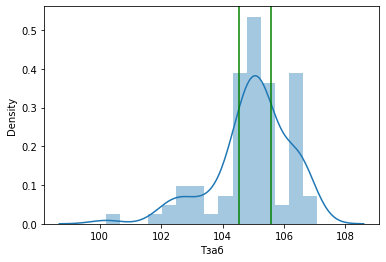

In [ ]:
info_printer(df_less_missing_rows['Тзаб'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 89
Среднее:	 39.798
Минимум:	 16.205
Максимум:	 55.514
1 кваниль:	 33.689
Медиана:	 40.519
3 квантиль:	 47.8
Кварт. размах:	 14.111
Стандарт.откл:	 8.938


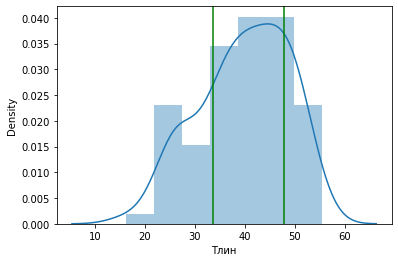

In [ ]:
info_printer(df_less_missing_rows['Tлин'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 93
Среднее:	 394.403
Минимум:	 128.366
Максимум:	 846.816
1 кваниль:	 287.95
Медиана:	 383.72
3 квантиль:	 489.673
Кварт. размах:	 201.723
Стандарт.откл:	 150.355


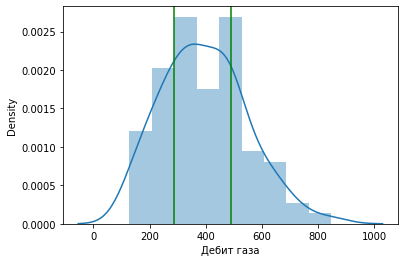

In [ ]:
info_printer(df_less_missing_rows['Дебит газа'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 92
Среднее:	 99.91
Минимум:	 33.63
Максимум:	 302.621
1 кваниль:	 69.9
Медиана:	 89.8
3 квантиль:	 117.6
Кварт. размах:	 47.7
Стандарт.откл:	 49.141


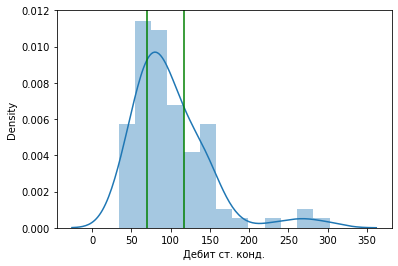

In [ ]:
info_printer(df_less_missing_rows['Дебит ст. конд.'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 77
Среднее:	 2.133
Минимум:	 0.0
Максимум:	 8.34
1 кваниль:	 0.7
Медиана:	 1.4
3 квантиль:	 3.2
Кварт. размах:	 2.5
Стандарт.откл:	 1.875


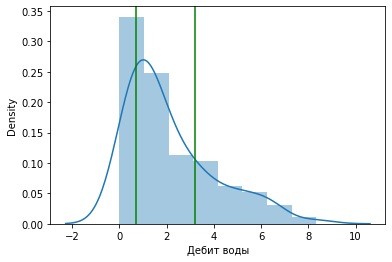

In [ ]:
info_printer(df_less_missing_rows['Дебит воды'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 4.301 %
Мощность:	 89
Среднее:	 417.021
Минимум:	 136.815
Максимум:	 896.908
1 кваниль:	 306.243
Медиана:	 401.391
3 квантиль:	 509.047
Кварт. размах:	 202.804
Стандарт.откл:	 157.747


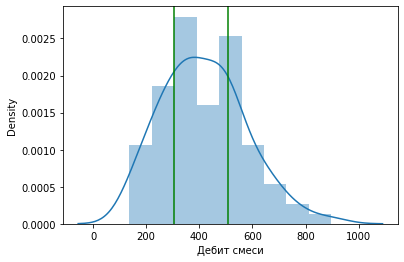

In [ ]:
info_printer(df_less_missing_rows['Дебит смеси'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 92
Среднее:	 3282.971
Минимум:	 884
Максимум:	 6943.1
1 кваниль:	 2223.0
Медиана:	 3112.0
3 квантиль:	 4165.0
Кварт. размах:	 1942.0
Стандарт.откл:	 1353.044


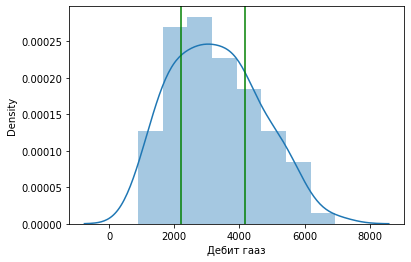

In [ ]:
info_printer(df_less_missing_rows['Дебит гааз'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 90
Среднее:	 164.152
Минимум:	 59.8
Максимум:	 492.8
1 кваниль:	 116.8
Медиана:	 143.5
3 квантиль:	 185.2
Кварт. размах:	 68.4
Стандарт.откл:	 85.225


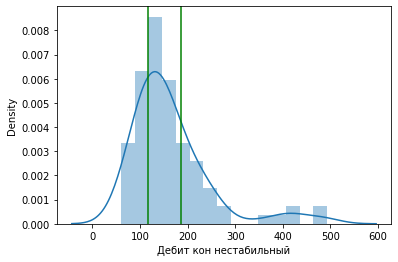

In [ ]:
info_printer(df_less_missing_rows['Дебит кон нестабильный'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 42
Среднее:	 2.163
Минимум:	 0
Максимум:	 8.1
1 кваниль:	 0.7
Медиана:	 1.4
3 квантиль:	 3.3
Кварт. размах:	 2.6
Стандарт.откл:	 1.903


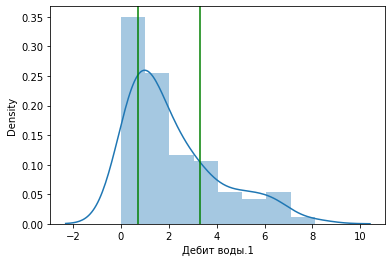

In [ ]:
info_printer(df_less_missing_rows['Дебит воды.1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 14
Среднее:	 52.703
Минимум:	 30.0
Максимум:	 72.54
1 кваниль:	 44.2
Медиана:	 56.8
3 квантиль:	 63.5
Кварт. размах:	 19.3
Стандарт.откл:	 12.149


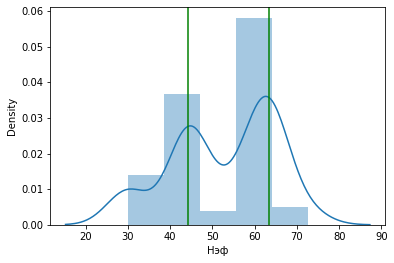

In [ ]:
info_printer(df_less_missing_rows['Нэф'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 5.376 %
Мощность:	 21
Среднее:	 40.683
Минимум:	 29.17
Максимум:	 53.27
1 кваниль:	 37.21
Медиана:	 39.466
3 квантиль:	 42.86
Кварт. размах:	 5.65
Стандарт.откл:	 5.374


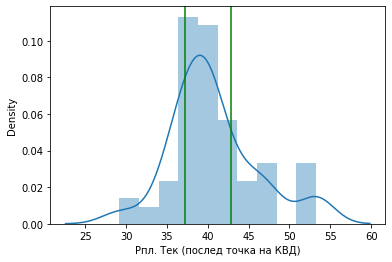

In [ ]:
info_printer(df_less_missing_rows['Рпл. Тек (послед точка на КВД)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 12.903 %
Мощность:	 18
Среднее:	 50.944
Минимум:	 39.9
Максимум:	 56.7
1 кваниль:	 48.3
Медиана:	 50.8
3 квантиль:	 55.4
Кварт. размах:	 7.1
Стандарт.откл:	 4.378


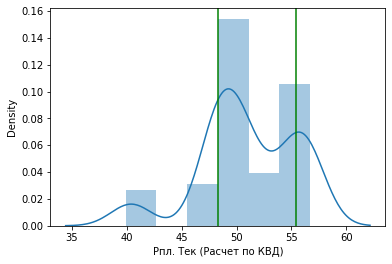

In [ ]:
info_printer(df_less_missing_rows['Рпл. Тек (Расчет по КВД)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 31.183 %
Мощность:	 13
Среднее:	 50.773
Минимум:	 41.6
Максимум:	 56.8
1 кваниль:	 49.425
Медиана:	 50.9
3 квантиль:	 52.7
Кварт. размах:	 3.275
Стандарт.откл:	 4.007


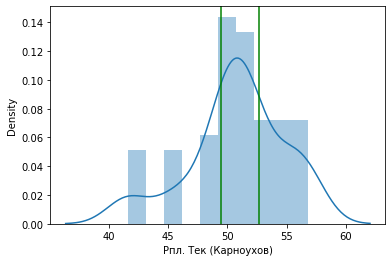

In [ ]:
info_printer(df_less_missing_rows['Рпл. Тек (Карноухов)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 70
Среднее:	 95.162
Минимум:	 85.5
Максимум:	 104.0
1 кваниль:	 90.7
Медиана:	 94.2
3 квантиль:	 99.8
Кварт. размах:	 9.1
Стандарт.откл:	 5.136


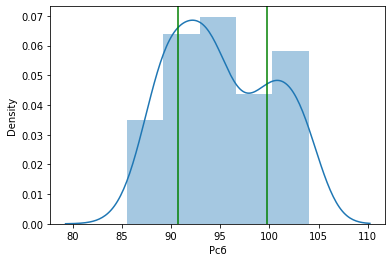

In [ ]:
info_printer(df_less_missing_rows['Pсб'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 70
Среднее:	 93.918
Минимум:	 84.382
Максимум:	 102.64
1 кваниль:	 89.514
Медиана:	 92.968
3 квантиль:	 98.495
Кварт. размах:	 8.981
Стандарт.откл:	 5.069


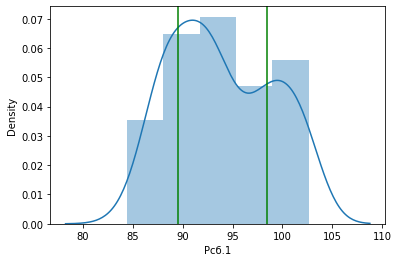

In [ ]:
info_printer(df_less_missing_rows['Pсб.1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 25
Среднее:	 780.848
Минимум:	 186.0
Максимум:	 801.0
1 кваниль:	 782.0
Медиана:	 787.0
3 квантиль:	 793.7
Кварт. размах:	 11.7
Стандарт.откл:	 62.795


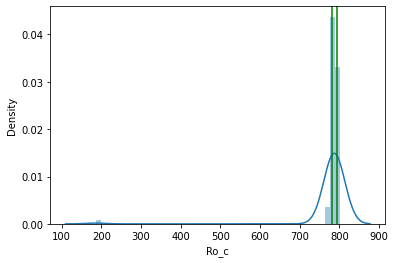

In [ ]:
info_printer(df_less_missing_rows['Ro_c'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 21
Среднее:	 0.665
Минимум:	 0.57
Максимум:	 0.685
1 кваниль:	 0.66
Медиана:	 0.667
3 квантиль:	 0.679
Кварт. размах:	 0.019
Стандарт.откл:	 0.02


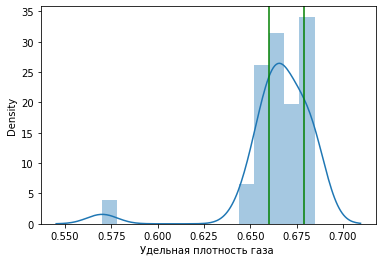

In [ ]:
info_printer(df_less_missing_rows['Удельная плотность газа '])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 75.269 %
Мощность:	 23
Среднее:	 5.742
Минимум:	 2.783
Максимум:	 10.931
1 кваниль:	 4.382
Медиана:	 5.251
3 квантиль:	 6.126
Кварт. размах:	 1.744
Стандарт.откл:	 2.113


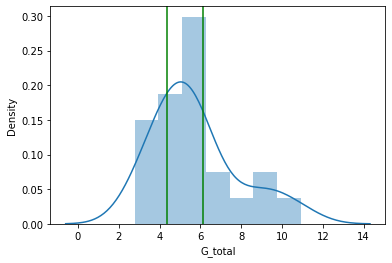

In [ ]:
info_printer(df_less_missing_rows['G_total'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Пропущено:	 0.0 %
Мощность:	 72
Среднее:	 0.202
Минимум:	 0.131
Максимум:	 0.385
1 кваниль:	 0.164
Медиана:	 0.192
3 квантиль:	 0.224
Кварт. размах:	 0.06
Стандарт.откл:	 0.049


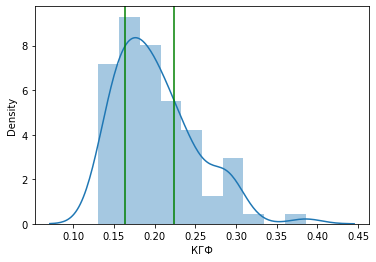

In [ ]:
info_printer(df_less_missing_rows['КГФ'])

In [27]:
for col in df_less_missing_rows.columns:
    pct_missing = np.mean(df_less_missing_rows[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Глубина манометра - 3%
Dшт - 0%
Руст - 0%
Рзаб - 3%
Pлин - 0%
Руст.1 - 0%
Рзаб.1 - 3%
Рлин - 0%
Туст - 0%
Тна шлейфе - 35%
Тзаб - 3%
Tлин - 0%
Дебит газа - 0%
Дебит ст. конд. - 0%
Дебит воды - 0%
Дебит смеси - 4%
Дебит гааз - 0%
Дебит кон нестабильный - 0%
Дебит воды.1 - 0%
Нэф - 0%
Рпл. Тек (послед точка на КВД) - 5%
Рпл. Тек (Расчет по КВД) - 13%
Рпл. Тек (Карноухов) - 31%
Pсб - 0%
Pсб.1 - 0%
Ro_c - 0%
Удельная плотность газа  - 0%
G_total - 75%
КГФ - 0%


In [11]:
for i in range(df_less_missing_rows.shape[1]-3, -1, -1):
    if df_less_missing_rows[df_less_missing_rows.columns[i]].isna().sum() / df_less_missing_rows[df_less_missing_rows.columns[i]].size > 0.61:
        df_less_missing_rows = df_less_missing_rows.drop(df_less_missing_rows.columns[i], axis = 1)
df_less_missing_rows = df_less_missing_rows.drop("Ro_c", axis = 1)

In [12]:
df_less_missing_rows.head()

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Удельная плотность газа,G_total,КГФ
2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,53.0,31.7,...,0.4,56.8,45.25,56.5,NaN,93.6,92.376018,0.669449,2.782623,0.311909
2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,58.8,37.6,...,1.4,56.8,45.25,56.5,NaN,92.9,91.685171,0.669449,3.697781,0.288600
2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,63.6,42.8,...,1.9,56.8,45.25,56.5,NaN,91.4,90.204787,0.669449,4.515073,0.248791
2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,64.7,46.2,...,3.3,56.8,45.25,56.5,NaN,89.2,88.033555,0.669449,5.217673,0.223559
2008-06-09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,64.0,49.4,...,4.7,56.8,45.25,56.5,NaN,89.7,88.527017,0.669449,5.765092,0.215149


In [13]:
X = df_less_missing_rows[df_less_missing_rows.columns[:-2]].fillna(-100)
y = df_less_missing_rows[df_less_missing_rows.columns[-2:]].fillna(-100)

In [14]:
rg = RandomForestRegressor()
rg.fit(X, y)
rg.feature_importances_

array([8.78084894e-04, 1.42935629e-03, 2.12351390e-03, 1.94843107e-03,
       2.01760148e-02, 1.22053685e-06, 3.29977070e-03, 9.30069365e-03,
       9.14584501e-04, 1.62121753e-03, 2.42637085e-02, 5.68284351e-03,
       5.72434396e-05, 2.84954376e-02, 7.07481496e-04, 2.13116136e-03,
       1.90623469e-03, 5.72018544e-04, 2.43104940e-05, 1.57599860e-03,
       8.43165315e-01, 2.67432121e-02, 1.52336952e-07, 1.33996239e-06,
       7.04730910e-07, 2.29799493e-02])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

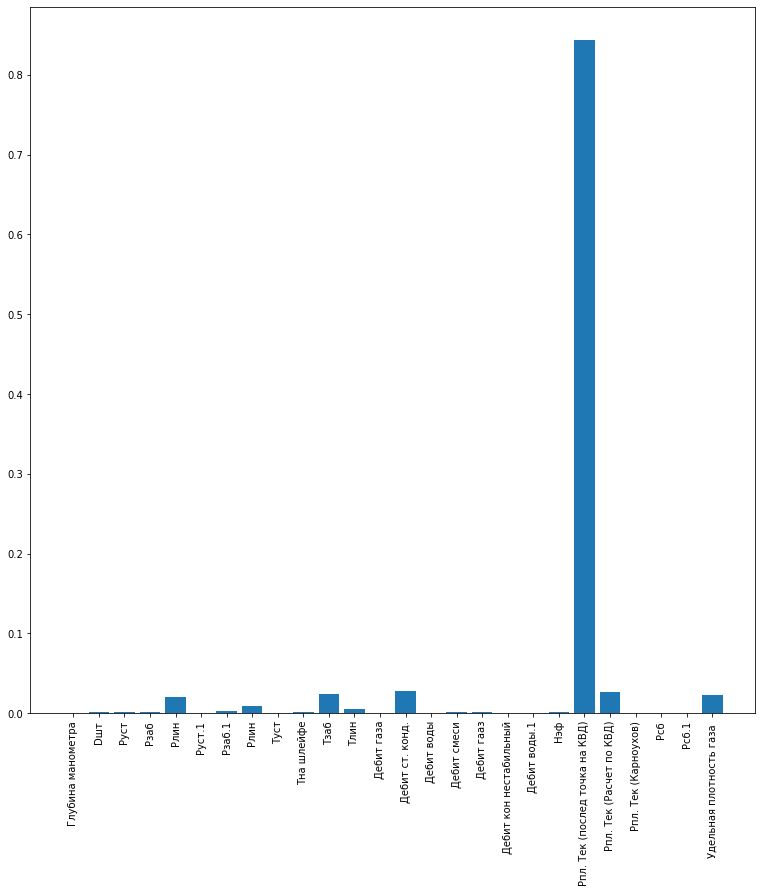

In [15]:
plt.figure(figsize=(13,13))
plt.bar(X.columns, rg.feature_importances_)
plt.xticks(rotation=90)